### LITTLE EYES V3
#### Meu Terceiro Modelo de Visão Computacional
Validação cruzada / controle de parada para selecionar o modelo mais genérico

In [1]:
# NETWORK
the_seed = 32
digit_size = (28, 28, 1)
convnn_acivation = 'relu'
fully_connected_acivation = 'tanh'
hyperparameter_max = 5
learning_rate = 0.01
max_epochs = 5
score_metric = 'accuracy'
verbose = 1

# VALIDATION
n_folds = 5

In [42]:
import tensorflow
from tensorflow.keras import datasets, layers, models, optimizers, Input, Model
from matplotlib import pyplot
import numpy
import pandas
import random
from sklearn.model_selection import StratifiedKFold
from seaborn import boxplot
from sklearn.metrics import accuracy_score

In [3]:
random.seed(the_seed)
numpy.random.seed(the_seed)
tensorflow.random.set_seed(the_seed)

In [4]:
def create_litle_eyes(digit_size : tuple[int, int, int] = (28, 28, 1),
                      convnn_acivation : str = 'relu',
                      fully_connected_acivation : str = 'tanh',
                      net_name : str = 'LittleEyes',
                      hyperparameter : int = 1):
    # CAMADA OCULTA
    inputs = Input(shape=digit_size)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = layers.Conv2D(2 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = layers.MaxPooling2D((2, 2))
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_2(x)

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = layers.MaxPooling2D((2, 2))
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = layers.MaxPooling2D((2, 2))
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = layers.Dense(hyperparameter + 1, activation = fully_connected_acivation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = layers.Dense(10)
    outputs = output_layer(x)

    return Model(inputs = inputs, outputs = outputs, name = net_name)

In [5]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [6]:
result_list = []
kfolder = StratifiedKFold(n_splits = n_folds, random_state = the_seed, shuffle = True)

for hyperparameter in numpy.arange(1, hyperparameter_max + 1):
    for i, (train_index, validation_index) in enumerate(kfolder.split(train_images, train_labels)):
        print(f"Starting h: {hyperparameter} f: {i}")
        X_train, Y_train = train_images[train_index], train_labels[train_index]
        X_val, Y_val = train_images[validation_index], train_labels[validation_index]
        
        # NET NAME > Hyperparameter + Fold Number
        net_name = f"LittleEyes_{hyperparameter}_{i}"
        print(f"{net_name} training started...")
        
        little_eyes = create_litle_eyes(net_name = net_name, 
                                        hyperparameter = hyperparameter)
        
        opt = optimizers.Adam(learning_rate = learning_rate)
        
        little_eyes.compile(optimizer=opt ,
                    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=[score_metric])

        history = little_eyes.fit(X_train, Y_train, epochs = max_epochs, 
                            validation_data=(X_val, Y_val), 
                            verbose = verbose)
        
        training_score = history.history[score_metric][-1]
        validation_score = history.history[f"val_{score_metric}"][-1]
        
        result_list.append((net_name, hyperparameter, i, training_score, validation_score, little_eyes))
        print(f"{net_name.upper()}: {100 * training_score:.0f}% TRAINING {score_metric.upper()} / {100 * validation_score:.0f}% VALIDATION {score_metric.upper()}")

Starting h: 1 f: 0
LittleEyes_1_0 training started...
Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 1.3826 - accuracy: 0.4439 - val_loss: 1.1864 - val_accuracy: 0.5745
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 1.1190 - accuracy: 0.5994 - val_loss: 1.0584 - val_accuracy: 0.6296
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 1.0254 - accuracy: 0.6405 - val_loss: 1.0508 - val_accuracy: 0.6075
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9927 - accuracy: 0.6560 - val_loss: 0.9514 - val_accuracy: 0.6726
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9657 - accuracy: 0.6695 - val_loss: 0.9680 - val_accuracy: 0.6670
LITTLEEYES_1_0: 67% TRAINING ACCURACY / 67% VALIDATION ACCURACY
Starting h: 1 f: 1
LittleEyes_1_1 training started...
Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 1.5454 - accuracy: 0.3859 - val_

In [7]:
# result_list = []

# for hyperparameter in numpy.arange(1, hyperparameter_max + 1):
#     net_name = f"LittleEyes_{hyperparameter}"
#     print(f"{net_name} training started...")
    
#     little_eyes = create_litle_eyes(net_name = net_name, 
#                                     hyperparameter = hyperparameter)
    
#     opt = optimizers.Adam(learning_rate = learning_rate)
    
#     little_eyes.compile(optimizer=opt ,
#                 loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=[score_metric])

#     history = little_eyes.fit(train_images, train_labels, epochs = max_epochs, 
#                         validation_data=(validation_images, validation_labels), verbose = verbose)
    
#     training_score = history.history[score_metric][-1]
#     validation_score = history.history[f"val_{score_metric}"][-1]
    
#     result_list.append((net_name, hyperparameter, training_score, validation_score, little_eyes))
#     print(f"{net_name.upper()}: {100 * training_score:.0f}% TRAINING {score_metric.upper()} / {100 * validation_score:.0f}% VALIDATION {score_metric.upper()}")

In [8]:
results = pandas.DataFrame.from_records(result_list)
results.columns = ["net_name", 'hyperparameter', "kfold", score_metric, f"val_{score_metric}", "little_eyes"]
results.sort_values("val_accuracy", ascending = False)

,net_name,hyperparameter,kfold,accuracy,val_accuracy,little_eyes
24,LittleEyes_5_4,5,4,0.952146,0.955250,<keras.engine.functional.Functional object at ...
15,LittleEyes_4_0,4,0,0.952521,0.955167,<keras.engine.functional.Functional object at ...
19,LittleEyes_4_4,4,4,0.948458,0.949333,<keras.engine.functional.Functional object at ...
17,LittleEyes_4_2,4,2,0.952333,0.948250,<keras.engine.functional.Functional object at ...
16,LittleEyes_4_1,4,1,0.956708,0.946083,<keras.engine.functional.Functional object at ...
21,LittleEyes_5_1,5,1,0.950521,0.941333,<keras.engine.functional.Functional object at ...
12,LittleEyes_3_2,3,2,0.943563,0.939583,<keras.engine.functional.Functional object at ...
22,LittleEyes_5_2,5,2,0.949021,0.936167,<keras.engine.functional.Functional object at ...
14,LittleEyes_3_4,3,4,0.948208,0.934333,<keras.engine.functional.Functional object at ...
11,LittleEyes_3_1,3,1,0.934375,0.932917,<keras.engine.functional.Functional object at ...


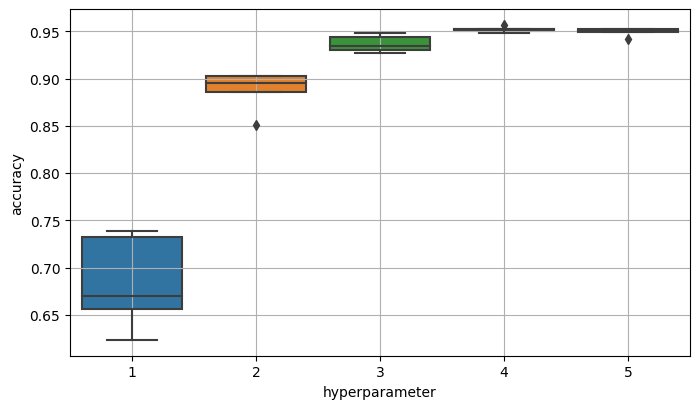

In [12]:
fig = pyplot.figure(figsize = (8, 4.5))
ax = fig.add_subplot(111)
boxplot(results, x = 'hyperparameter', y = 'accuracy', ax = ax)
ax.grid()

In [18]:
little_eyes = results.sort_values("val_accuracy", ascending = False).head(1)['little_eyes'].values[0]
little_eyes

In [21]:
Y_test = little_eyes.predict(validation_images)

313/313 [==============================] - 1s 3ms/step


In [34]:
Y_predicted = numpy.argmax(Y_test, axis = 1)
Y_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

TRUE NUMBER: 1 >> PREDICTED NUMBER: 1


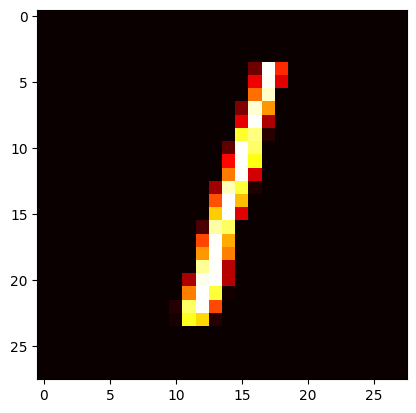

In [40]:
# TABAJARA VALIDATOR
image_id = 2
print(f"TRUE NUMBER: {validation_labels[image_id]} >> PREDICTED NUMBER: {Y_predicted[image_id]}")
# Y_test[image_id, :]
pyplot.imshow(validation_images[image_id], cmap='hot')

In [43]:
accuracy_score(validation_labels, Y_predicted)

0.9559